# Project 1

## Franke function

/var/folders/_t/pzbtlqfs06q4gkr88b12hv9r0000gn/T/ipykernel_40202/39730396.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


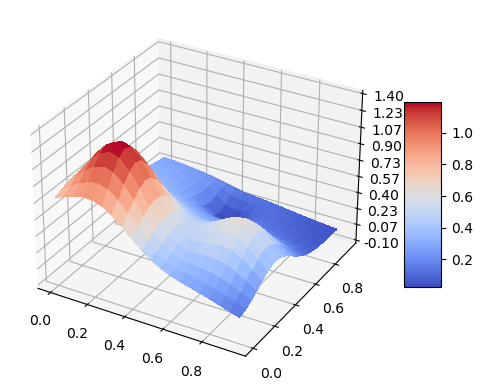

In [3]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Ordinary Least Squares

In [22]:
from sklearn.model_selection import train_test_split

def create_X(x, y, degree):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((degree+1)*(degree+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,degree+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)
	return X
n = 1000
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
z = FrankeFunction(x, y)
X = create_X(x, y, degree=1)
print (X.shape)

U, S, VT = np.linalg.svd(X,full_matrices=True)
print (U)

(1000, 3)
[[-0.02005513  0.05956987 -0.02696518 ... -0.02994253 -0.02992764
  -0.02992471]
 [-0.02009932  0.05935509 -0.0250622  ...  0.05681255  0.0570625
   0.05708771]
 [-0.02013363  0.05918775 -0.0257145  ... -0.06432566 -0.06584295
  -0.066229  ]
 ...
 [-0.04212012 -0.04795798 -0.06476323 ...  0.9917237  -0.00838828
  -0.00841464]
 [-0.04216746 -0.04818909 -0.06628452 ... -0.00838676  0.99149892
  -0.00852802]
 [-0.0421718  -0.04821036 -0.06667125 ... -0.00841264 -0.00852754
   0.99144537]]


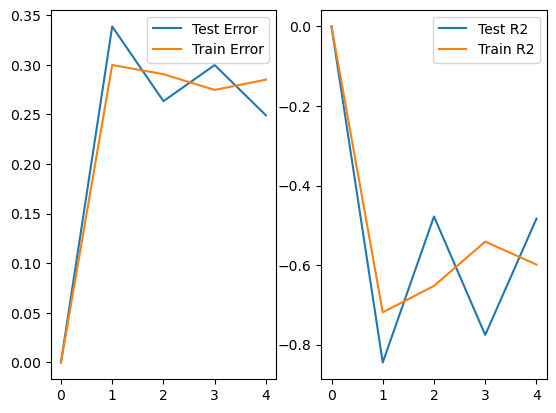

In [48]:
from sklearn.model_selection import train_test_split

def create_X(x, y, degree):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((degree+1)*(degree+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,degree+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)
	return X

def scaler(X):
	for column in range(X.shape[1]):
		if np.std(X[:,column]) != 0:
			X[:,column] = (X[:,column] - np.mean(X[:,column]))/np.std(X[:,column])
		else:
			X[:,column] = 0
	return X

def MSE (y, ytilde):
	MSE = 0
	for i in range(len(y)):
		MSE += (y[i]-ytilde[i])**2
	return MSE/len(y)

def R2 (y, ytilde):
	R2 = 1 - (np.sum((y-ytilde)**2)/np.sum((y-np.mean(y))**2))
	return R2

maxdegree = 5
n = 1000
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
z = FrankeFunction(x, y)

TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
TestR2 = np.zeros(maxdegree)
TrainR2 = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
for degree in range (1,maxdegree):
	X = create_X(x, y, degree)
	# split training and test data
	X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
	X_train_scaled = scaler(X_train)
	X_test_scaled = scaler(X_test)

	#scaling, centering t
	U, S, VT = np.linalg.svd(X_train_scaled,full_matrices=False)
	beta = VT.T @ np.linalg.pinv(np.diag(S)) @ U.T
	beta = (VT.T @ np.linalg.pinv(np.diag(S)) @ U.T) @ y_train
	ztilde = X_train_scaled @ beta
	zpredict = X_test_scaled @ beta
	polydegree[degree] = degree
	TrainError[degree] = MSE(y_train, ztilde)
	TestError[degree] = MSE(y_test, zpredict)
	TrainR2[degree] = R2(y_train, ztilde)
	TestR2[degree] = R2(y_test, zpredict)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(polydegree, TestError, label='Test Error')
ax1.plot(polydegree, TrainError, label='Train Error')
ax1.legend()
ax2.plot(polydegree, TestR2, label='Test R2')
ax2.plot(polydegree, TrainR2, label='Train R2')
ax2.legend()
plt.show()